## Load Data

In [77]:
#Import libraries & Yahoo Finance API
import datetime, time
import yfinance as yfin
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
from datetime import date
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

pd.options.display.float_format = "{:,.6f}".format #Set decimal places

In [78]:
# Starting and end dates
start = datetime.date(2020, 6, 1)
end = datetime.date(2025, 10, 18)

!pip install curl_cffi -U
from curl_cffi import requests
session = requests.Session(impersonate = 'chrome')

# Get Amazon, Ford and Bitcoin data
df = yfin.download(["SSW.JO", "BAW.JO", "NPN.JO", "SOL.JO", "SBK.JO"], start, end, auto_adjust = False, session = session)["Adj Close"]

#df.to_csv("market_data.csv", index = False) #save to csv file, removing indexes
df.head()

[*********************100%***********************]  5 of 5 completed

Ticker,BAW.JO,NPN.JO,SBK.JO,SOL.JO,SSW.JO
Date,,,,,
2020-06-01,"5,647.048340","56,992.765625","9,619.171875","10,087.384766","3,340.525879"
2020-06-02,"5,988.840332","58,292.601562","10,093.652344","11,735.322266","3,590.965088"
2020-06-03,"5,997.137207","58,690.550781","11,346.637695","12,459.416992","3,372.454102"
2020-06-04,"6,027.002441","57,492.707031","11,235.989258","12,828.955078","3,512.142090"
2020-06-05,"6,967.762207","58,456.582031","11,934.752930","14,981.262695","3,431.322510"


# Relative Strength Indicator

In [79]:
#Define RSI 
def calculate_rsi(prices, period=14):
   delta = prices.diff().dropna() # Calculate price changes
    
   gain = delta.clip(lower=0) # Keep only positive changes
   loss = -delta.clip(upper=0) # Keep only negative changes
    
   avg_gain = gain.rolling(window=period).mean()
   avg_loss = loss.rolling(window=period).mean()
    
   rs = avg_gain / avg_loss # Relative Strength
   rsi = 100 - (100 / (1 + rs)) # RSI formula
    
   return rsi

In [80]:
#for i in range(5):
#    dat = calculate_rsi(df.iloc[:, 4])

dat = calculate_rsi(df["SSW.JO"])

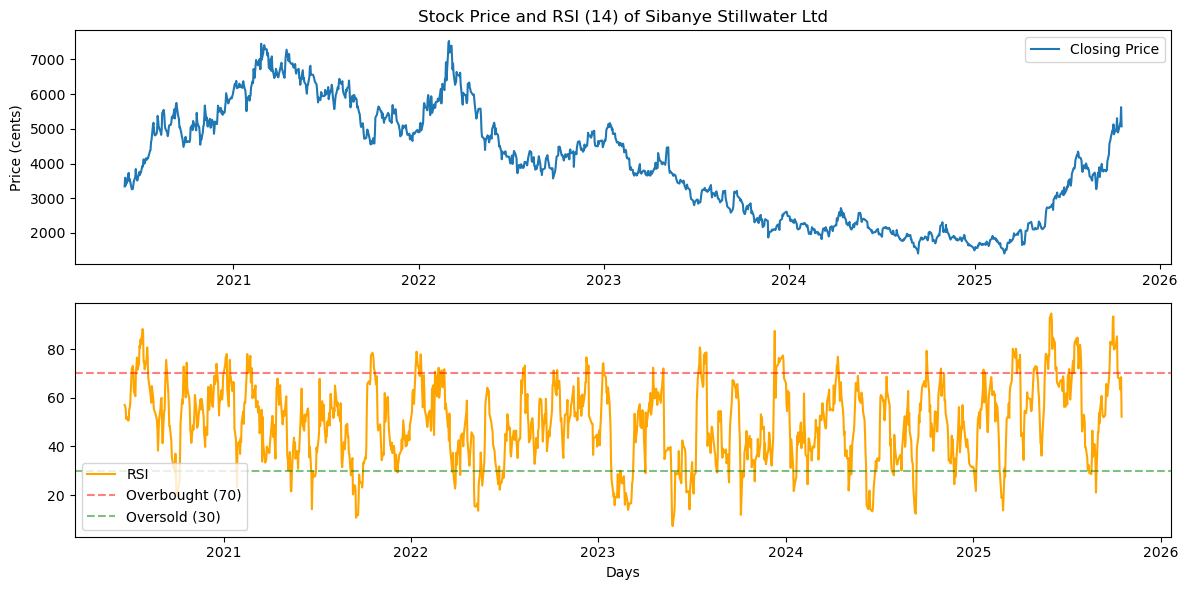

In [81]:
plt.figure(figsize=(12, 6))
# Plot Closing Prices
plt.subplot(2, 1, 1)
plt.plot(df.index, df["SSW.JO"], label='Closing Price')
plt.title('Stock Price and RSI (14) of Sibanye Stillwater Ltd')
plt.legend()
plt.ylabel('Price (cents)')

# Plot RSI
plt.subplot(2, 1, 2)
plt.plot(dat, label='RSI', color='orange')
plt.axhline(70, linestyle='--', color='red', alpha=0.5, label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', alpha=0.5, label='Oversold (30)')
plt.legend()
plt.xlabel('Days')
plt.tight_layout()
plt.show()

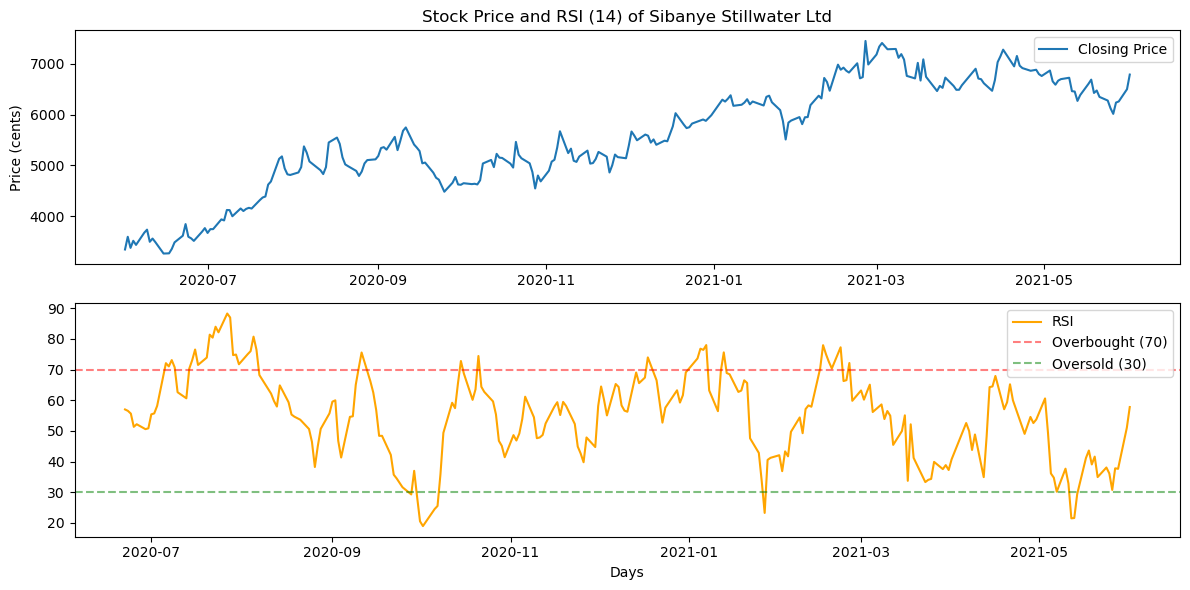

In [82]:
#Technical Does Not Works!

plt.figure(figsize=(12, 6))
# Plot Closing Prices
plt.subplot(2, 1, 1)
plt.plot(df.loc["2020-06-01":"2021-06-01", "SSW.JO"], label='Closing Price')
plt.title('Stock Price and RSI (14) of Sibanye Stillwater Ltd')
plt.legend()
plt.ylabel('Price (cents)')

# Plot RSI
plt.subplot(2, 1, 2)
plt.plot(dat.loc["2020-06-01":"2021-06-01"], label='RSI', color='orange')
plt.axhline(70, linestyle='--', color='red', alpha=0.5, label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', alpha=0.5, label='Oversold (30)')
plt.legend()
plt.xlabel('Days')
plt.tight_layout()
plt.show()

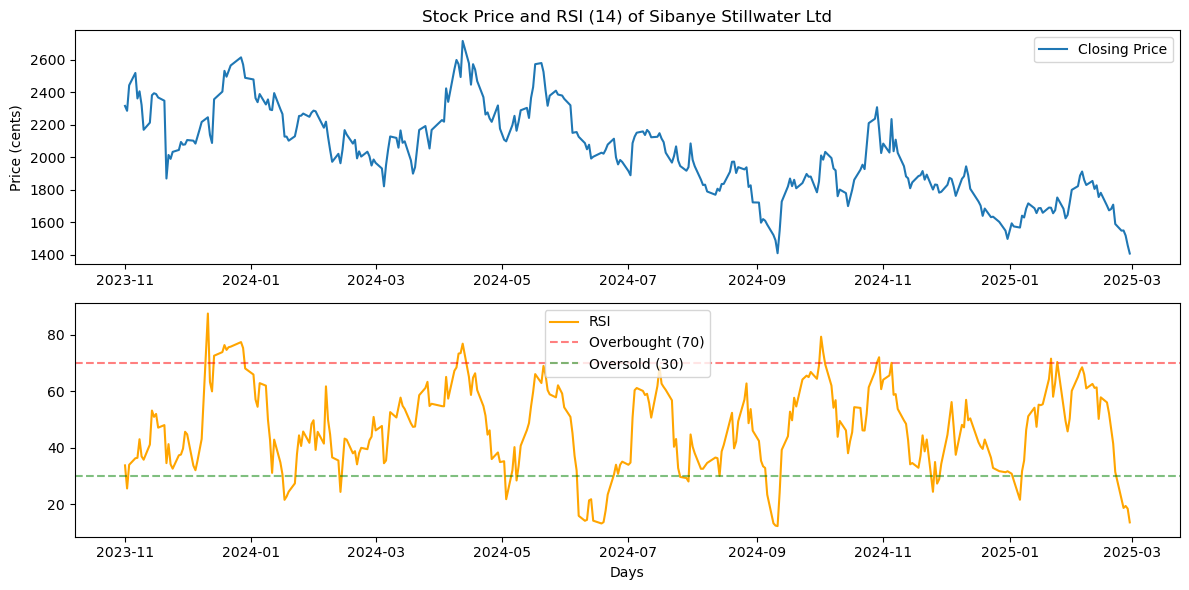

In [83]:
#Technical Works!

plt.figure(figsize=(12, 6))
# Plot Closing Prices
plt.subplot(2, 1, 1)
plt.plot(df.loc["2023-11-01":"2025-03-01", "SSW.JO"], label='Closing Price')
plt.title('Stock Price and RSI (14) of Sibanye Stillwater Ltd')
plt.legend()
plt.ylabel('Price (cents)')

# Plot RSI
plt.subplot(2, 1, 2)
plt.plot(dat.loc["2023-11-01":"2025-03-01"], label='RSI', color='orange')
plt.axhline(70, linestyle='--', color='red', alpha=0.5, label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', alpha=0.5, label='Oversold (30)')
plt.legend()
plt.xlabel('Days')
plt.tight_layout()
plt.show()

# Bollinger Bands

In [84]:
# Define parameters
window_size = 20
num_std = 2

rolling_dat = df.index[window_size-1:]

# Calculate rolling mean and standard deviation
rolling_mean = np.convolve(df["SSW.JO"], np.ones(window_size)/window_size, mode='valid')
rolling_std = np.std([df["SSW.JO"][i:i+window_size] for i in range(len(df["SSW.JO"])-window_size+1)], axis=1)

# Calculate Bollinger Bands
upper_band = rolling_mean + num_std * rolling_std
lower_band = rolling_mean - num_std * rolling_std

rolling_df = pd.DataFrame({
                "Date": rolling_dat,
                "Mean": rolling_mean,
                "Std": rolling_std,
                "Upper": upper_band,
                "Lower": lower_band})

#Set index
rolling_df = rolling_df.set_index("Date")

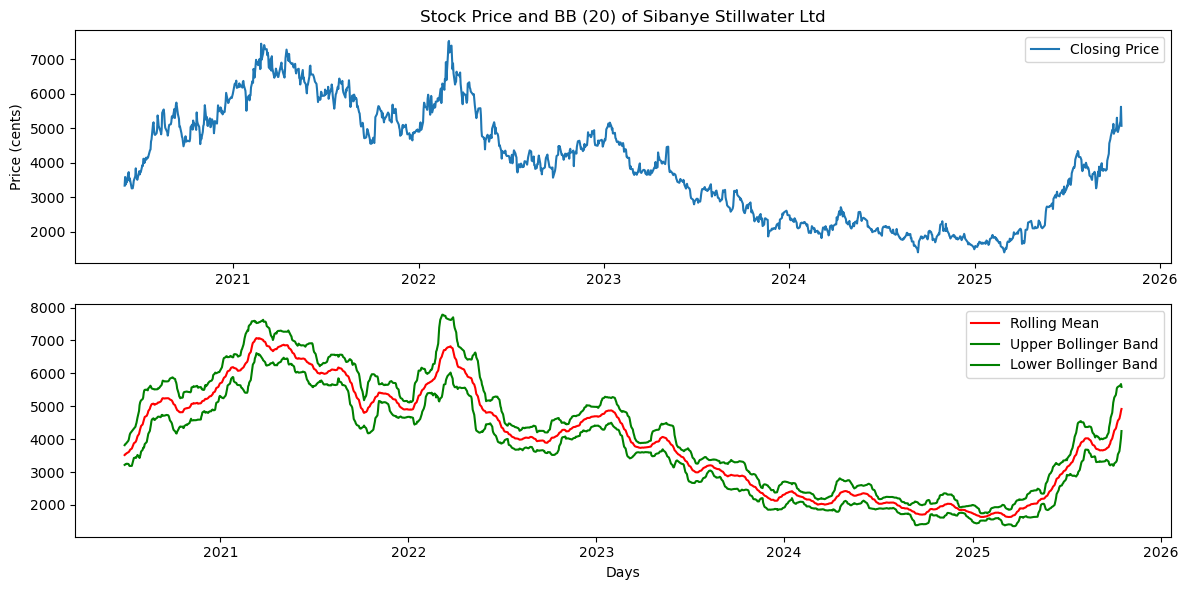

In [85]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot Closing Prices
plt.subplot(2, 1, 1)
plt.plot(df["SSW.JO"], label='Closing Price')
plt.title('Stock Price and BB (20) of Sibanye Stillwater Ltd')
plt.legend()
plt.ylabel('Price (cents)')

# Plot RSI
plt.subplot(2, 1, 2)
plt.plot(rolling_df["Mean"], label='Rolling Mean', color='red')
plt.plot(rolling_df["Upper"], label='Upper Bollinger Band', color='green')
plt.plot(rolling_df["Lower"], label='Lower Bollinger Band', color='green')
plt.legend()
plt.xlabel('Days')
plt.tight_layout()
plt.show()

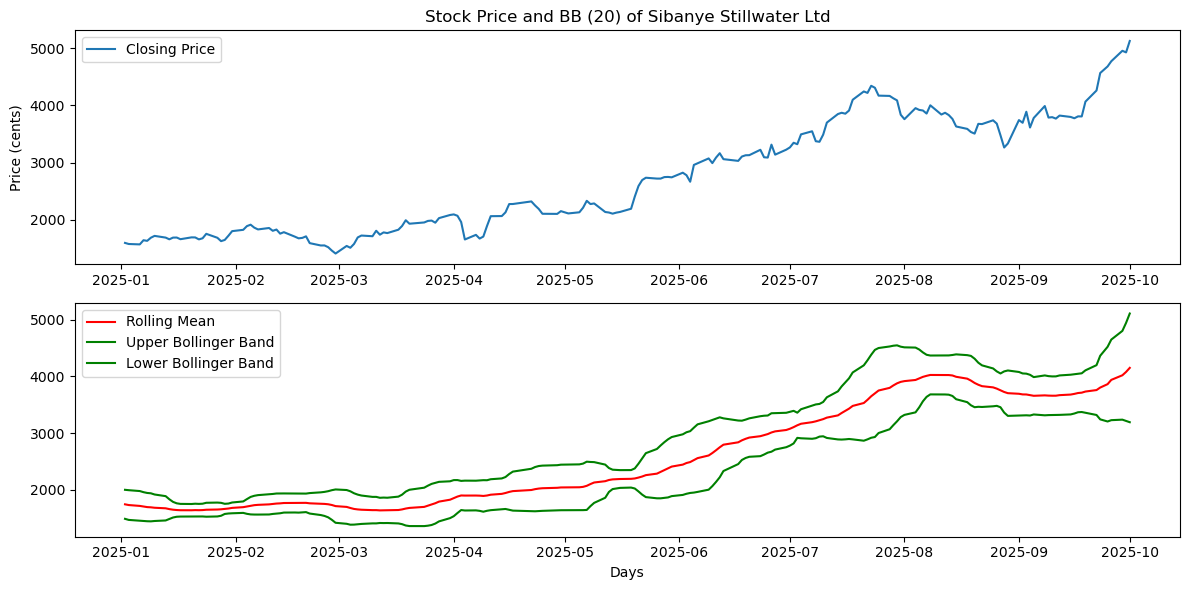

In [86]:
#Technical Works!

# Plotting
plt.figure(figsize=(12, 6))

# Plot Closing Prices
plt.subplot(2, 1, 1)
plt.plot(df.loc["2025-01-01":"2025-10-01", "SSW.JO"], label='Closing Price')
plt.title('Stock Price and BB (20) of Sibanye Stillwater Ltd')
plt.legend()
plt.ylabel('Price (cents)')

# Plot RSI
plt.subplot(2, 1, 2)
plt.plot(rolling_df.loc["2025-01-01":"2025-10-01", "Mean"], label='Rolling Mean', color='red')
plt.plot(rolling_df.loc["2025-01-01":"2025-10-01", "Upper"], label='Upper Bollinger Band', color='green')
plt.plot(rolling_df.loc["2025-01-01":"2025-10-01", "Lower"], label='Lower Bollinger Band', color='green')
plt.legend()
plt.xlabel('Days')
plt.tight_layout()
plt.show()

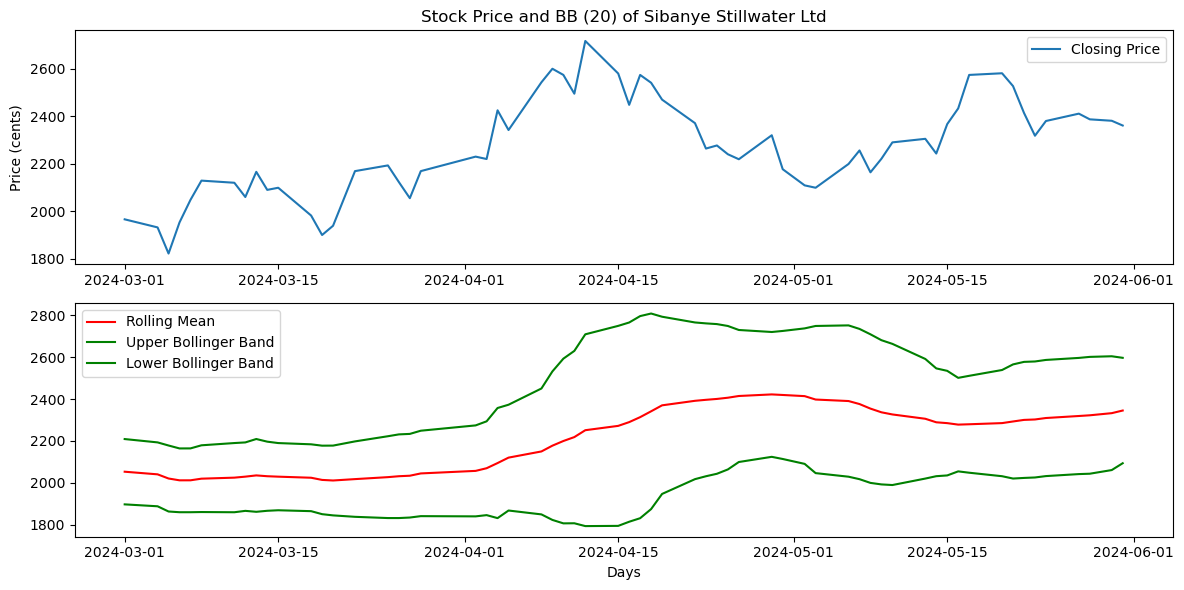

In [87]:
#Technical Does Not Works!

# Plotting
plt.figure(figsize=(12, 6))

# Plot Closing Prices
plt.subplot(2, 1, 1)
plt.plot(df.loc["2024-03-01":"2024-06-01", "SSW.JO"], label='Closing Price')
plt.title('Stock Price and BB (20) of Sibanye Stillwater Ltd')
plt.legend()
plt.ylabel('Price (cents)')

# Plot RSI
plt.subplot(2, 1, 2)
plt.plot(rolling_df.loc["2024-03-01":"2024-06-01", "Mean"], label='Rolling Mean', color='red')
plt.plot(rolling_df.loc["2024-03-01":"2024-06-01", "Upper"], label='Upper Bollinger Band', color='green')
plt.plot(rolling_df.loc["2024-03-01":"2024-06-01", "Lower"], label='Lower Bollinger Band', color='green')
plt.legend()
plt.xlabel('Days')
plt.tight_layout()
plt.show()

# Moving Average Convergence/Divergence Oscillator (MACD)

In [88]:
# Function to calculate MACD and Signal Line
def calculate_macd(prices, short_window=12, long_window=26, signal_window=9):
   short_ema = prices.ewm(span=short_window, adjust=False).mean() # Short-term EMA
   long_ema = prices.ewm(span=long_window, adjust=False).mean() # Long-term EMA
    
   macd_line = short_ema - long_ema # MACD Line
    
   signal_line = macd_line.ewm(span=signal_window, adjust=False).mean() # Signal Line
    
   return macd_line, signal_line

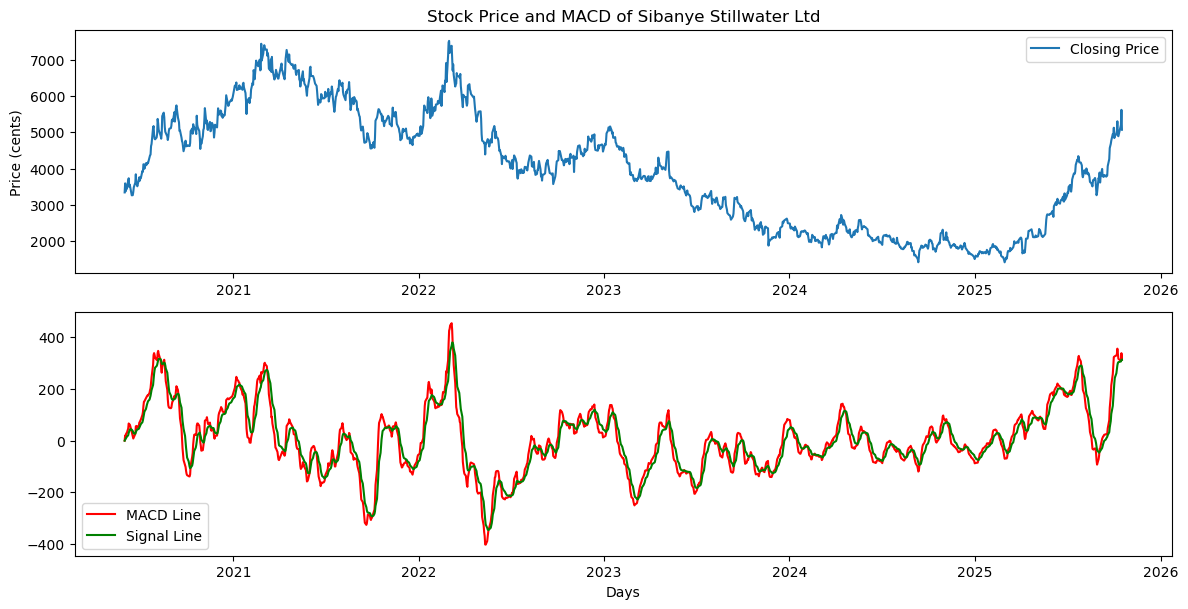

In [89]:
# Calculate MACD and Signal Line
macd_line, signal_line = calculate_macd(df["SSW.JO"])

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot Closing Prices
plt.subplot(2, 1, 1)
plt.plot(df["SSW.JO"], label='Closing Price')
plt.title('Stock Price and MACD of Sibanye Stillwater Ltd')
plt.legend()
plt.ylabel('Price (cents)')

# Plot RSI
plt.subplot(2, 1, 2)
plt.plot(macd_line, label='MACD Line', color='red')
plt.plot(signal_line, label='Signal Line', color='green')
plt.legend()
plt.tight_layout()
plt.xlabel('Days')
plt.show()